# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [593]:
import pandas as pd
import json
import requests as r
import numpy as np
##import tweepy 
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline

In [594]:
df1= pd.read_csv('twitter-archive-enhanced.csv')

In [595]:
## df_tweet_dog
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [596]:
## Method 1:

# df2= pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' , sep='\t')

########################################

## Method 2:

## saving url of image_predictions file to a variable

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

## download  tweet image prediction file using the url 
response = r.get(url)

## writing the file into directory
open('image-predictions.tsv', 'wb').write(response.content)

# df_img_predict
df2= pd.read_csv('image-predictions.tsv', sep = '\t')

In [597]:
df2.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

NB:    I didn't get approval for Twitter developer account yet, but I have read the tweepy code, understand it and then copy-paste it to the notebook below. in the other next cell I have parsed the tweet_json.txt provided by udacity and allowed to work with in case of unavailability of Twitter developer account as mentionned in this paragraph from udacity learn portal: "Accessing Project Data Without a Twitter Account
If you can't set up a Twitter developer account using the steps above, or you prefer not to create a Twitter account for some reason, you may instead follow the directions below to access the data necessary for the project. Note: We recommend that you follow the steps above to access the data using a Twitter developer account, because with the shortcut detailed below, you will miss practicing the valuable skill of gathering this data on your own. However, Twitter's updated process may not work for everyone, and we realize there are legitimate reasons that some students may prefer this approach, so we provide it to you here. You choose the approach to access the data that works best for you. This shortcut approach will certainly work for you to pass the project equally well." 

In the other side I plan to try it as soon as possible as the dev account is enabled.

In [598]:
dic_list=[]

with open("tweet-json.txt", "r") as file:
    for line in file:
        record = json.loads(line)
        dic_list.append(record)

#print dict content
#dic_list[1]

#df_tweet_json
df3 = pd.DataFrame(dic_list, columns=['id', 'retweet_count', 'favorite_count'])

In [599]:
df3.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data


### Quality issues
1.Incorrect data type: timestamp have the wrong data type.

2.Incorrect name "timestamp": does not reflect a comprehensive varaible.

3.Replies rows should be removed

4.Retweet rows should be removed

5.Replies and retweet columns should be removed.

6.Some rating_denominator values are less than 10 (Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent.").

7.Ratings: the most appropriate data type for the rating_numerator column should be float

8.The variables 'P1, P2, P3,'P1_conf, P2_conf, P3_conf,'P1_dog, P2_dog, P3_dog' columns are grouped into Breed and Confidence coloumns. 

9.Droping the 'P1, P2, P3,'P1_conf, P2_conf, P3_conf,'P1_dog, P2_dog, P3_dog' columns after creating Breed and Confidence coloumns

12.Original ratings (no retweets) that dont have images should be removed

13.ID field tweet_id should be object type, not integers or floats because they are not numeric and aren't intended to perform calculations.


## 1. Incorrect data type: timestamp have the wrong data type.

In [600]:
df1.info()
#timestamp type is object while it should be date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 2.Incorrect name "timestamp": does not reflect a comprehensive varaible.

In [601]:
df1.info()
##timestamp variable name is is not suitable for date we have change it to creation_date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 3.Replies rows should be removed

As describer in the project text in udacity learn portal : "You only want original ratings (no retweets) that have images". Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets."

## 4.Retweet rows should be removed

As describer in the project text in udacity learn portal : "You only want original ratings (no retweets) that have images". Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets."

## 5.Replies and retweet columns should be removed.

As describer in the project text in udacity learn portal : "You only want original ratings (no retweets) that have images". Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets."

In [602]:
df1.info()
# Replies and retweet in rows and coloumns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 6.Some rating_denominator values are less than 10 
(Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent.").

In [603]:
# sum of values in the rating_denominator column that are less than 10
(df1.rating_denominator < 10).sum()

3

## 7. Ratings: the most appropriate data type for the rating_numerator column should be float

In [604]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

## 8. The variables 'P1, P2, P3,'P1_conf, P2_conf, P3_conf,'P1_dog, P2_dog, P3_dog' columns are grouped into Breed and Confidence coloumns.

In [607]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 9.Droping the 'P1, P2, P3,'P1_conf, P2_conf, P3_conf,'P1_dog, P2_dog, P3_dog' columns after creating Breed and Confidence coloumns

In [608]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [609]:
df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


## 12. Original ratings (no retweets) that dont have images should be removed

In [610]:

#Principal dataframe that contain dog rating
print(df1.shape)

(2356, 17)


In [611]:
#dataframe that contains images
print(df2.shape)

(2075, 12)


ass mentionned In the project brief "You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets."
we can see that in image prediction df we have less images than the tweets in the principale DF

## 13. ID field  tweet_id should be object type, not integers or floats because they are not numeric and aren't intended to perform calculations.

In [612]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tidiness issues

1.(10) The variables doggo, floofer, pupper and puppo are grouped in one single variable.

In [613]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2.(11) Create a single dataframe from the three gathered data.
#df1 ,df2, df3, to the globale merge dataframe df6


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [754]:
# Make copies of original pieces of data
df1copy=df1.copy()
df2copy=df2.copy()
df3copy=df3.copy()

### Issue #1:


#### Define:
1.Incorrect data type: timestamp have the wrong data type

#### Code

In [615]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [616]:
#copy of original data
df1_clean = df1.copy()
# convert timestamp column to datetime
df1_clean["timestamp"] = pd.to_datetime(df1["timestamp"])

#### Test

In [617]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [618]:
df1_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #2:


#### Define
2.Incorrect name "timestamp": does not reflect a comprehensive varaible.

#### Code

In [619]:
# rename the timestamp column to creation_date
df1_clean = df1_clean.rename(columns={'timestamp': 'creation_date'})

#### Test

In [620]:
df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,creation_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Issue #3:

#### Define
2.Replies rows should be removed

#### Code

In [621]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
creation_date                 2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

In [622]:
# DF without rows where the value in the 'in_reply_to_status_id' column is null
df1_clean = df1_clean[df1_clean['in_reply_to_status_id'].isnull()]

#### Test

In [623]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
creation_date                 2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1),

### Issue #4:

#### Define
4.Retweet columns should be removed.

#### Code

In [624]:
# DF without rows where the value in the 'retweeted_status_id' column is null
df1_clean = df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### Test

In [625]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
creation_date                 2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

### Issue #5:

#### Define
5.Replies and retweet columns should be removed.

#### Code

In [626]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
creation_date                 2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

In [627]:
# drop the 'replies' and 'retweets' columns
df1_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [628]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


### Issue #6:

#### Define
6.some rating_denominator values are less than 10 (Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent.").

#### Code

In [629]:
# sum of values in the rating_denominator column that are less than 10
(df1_clean.rating_denominator < 10).sum()

2

In [630]:
# find values in the rating_denominator column that are less than 10 and put value 10 instead

df1_clean.loc[df1_clean["rating_denominator"] < 10, "rating_denominator"] = 10

#### Test

In [631]:
(df1_clean.rating_denominator < 10).sum()

0

### Issue #7:

#### Define
7.Ratings: the most appropriate data type for the rating_numerator column should be float

#### Code

In [632]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [633]:
df1_clean["rating_numerator"] = df1_clean["rating_numerator"].astype(float)

#### Test

In [634]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 213.0+ KB


### Issue #8:

#### Define
8.The variables 'P1, P2, P3,'P1_conf, P2_conf, P3_conf,'P1_dog, P2_dog, P3_dog' columns are grouped into Breed and Confidence coloumns. 

#### Code

In [635]:
#condition list
df2_clean=df2.copy()
condition = [(df2_clean['p1_dog'] == True), (df2_clean['p2_dog'] == True), (df2_clean['p3_dog'] == True)]

breed = [df2_clean['p1'],df2_clean['p2'], df2_clean['p3']]

confidence =  [df2_clean['p1_conf'],df2_clean['p2_conf'], df2_clean['p3_conf']]

df2_clean['breed'] = np.select(condition, breed, default='none')

df2_clean['confidence'] = np.select(condition, confidence, default=0.0)

#### Test

In [636]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
p1            2075 non-null object
p1_conf       2075 non-null float64
p1_dog        2075 non-null bool
p2            2075 non-null object
p2_conf       2075 non-null float64
p2_dog        2075 non-null bool
p3            2075 non-null object
p3_conf       2075 non-null float64
p3_dog        2075 non-null bool
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


### Issue #9:

#### Define
9.Drop the 'P1, P2, P3,'P1_conf, P2_conf, P3_conf,'P1_dog, P2_dog, P3_dog' columns after creating Breed and Confidence coloumns

#### Code

In [637]:
# drop the 'P1,P2,P3,'P1_conf,P2+conf,P3_conf,'P1_dog,P2_dog,P3_dog' columns
df2_clean.drop(columns=['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], inplace=True)

#### Test

In [638]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null int64
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.1+ KB


### Issue #10:

#### Define
10.Creat dog_stage Coloumn based on existing coloumns (doggo, floofer, pupper and puppo)

#### Code

In [639]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 213.0+ KB


In [640]:
#df1_test= df1_clean

# create new column 'dog_stage' by using the existing columns
#df1_clean['dog_stage'] = np.where(df1_clean['doggo'] == 'doggo', 'doggo',
#                        np.where(df1_clean['floofer'] == 'floofer', 'floofer',
#                        np.where(df1_clean['pupper'] == 'pupper', 'pupper',
#                        np.where(df1_clean['puppo'] == 'puppo', 'puppo', 'None'))))





In [641]:
# handle none
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)

# merge into column
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

# handle multiple stages
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df1_clean.loc[df1_clean.dog_stage == '', 'dog_stage'] = np.nan

In [643]:
df1_clean.head()

,tweet_id,creation_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,,,,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,,,,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,,,,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,,,,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,,,,NaN


In [644]:
# drop the existing dog stage columns
#df1_test.drop(columns=["doggo", "floofer", "pupper", "puppo"])
df1_clean.drop(columns=["doggo", "floofer", "pupper", "puppo"], inplace=True)

#### Test

In [645]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 163.8+ KB


In [646]:
# for example: count the number of 'pupper' in the 'dog_stage' column
pupper_count = df1_clean["dog_stage"].value_counts()["pupper"]

print("Number of pupper in dog_stage column: ", pupper_count)

Number of pupper in dog_stage column:  221


#######################
##For more coherence###

#### Define
change name of the coloumn from 'id' to 'tweet_id' for more coherence in coloumn names

#### Code

In [647]:
#creat a copy of df3
df3_clean = df3.copy()
df3_clean = df3_clean.rename(columns={'id':'tweet_id'})

#### Test

In [648]:
df3_clean.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Issue #11:

#### Define

11.Create a single dataframe from the three gathered data.

#### Code

In [649]:
#join two dataframes df_tweet_dog and df_tweet_json
df4 = pd.merge(df1_clean, df3_clean, on='tweet_id', how='left' )

In [650]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 196.6+ KB


In [651]:
#join two dataframes : the resulting df_tweet_dog and df_tweet_json + image-prediction DF
df5 = pd.merge(df4, df2_clean, on='tweet_id', how='left' )

#### Test

In [652]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              2097 non-null int64
creation_date         2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int64
favorite_count        2097 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 262.1+ KB


### Issue #12:

#### Define

12.Original ratings (no retweets) that dont have images should be removed

#### Code

In [719]:
# take in condideration only Original ratings (no retweets) that have images
# df6 is the merged Dataframe
df6 = df5[df5["jpg_url"].notnull()]

#### Test

In [720]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1971 non-null int64
creation_date         1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 246.4+ KB


In [721]:
df6.head()

,tweet_id,creation_date,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,none,0.000000
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


### Issue #13:

#### Define

13. ID field  tweet_id should be object type, not integers or floats because they are not numeric and aren't intended to perform calculations.

#### Code

In [722]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1971 non-null int64
creation_date         1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 246.4+ KB


In [723]:
df6_clean = df6.copy()

# convert timestamp column to float
#df3_clean["retweet_count"] = pd.to_float(df3["retweet_count"])
df6_clean["tweet_id"] = df6_clean["tweet_id"].astype(object)



#### Test

In [724]:
df6_clean.info()
#tweet type is Object noq

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 15 columns):
tweet_id              1971 non-null object
creation_date         1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             303 non-null object
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null float64
breed                 1971 non-null object
confidence            1971 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 246.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [755]:
df6.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [726]:
#Most used Dog Names
#removed none and a
df6.name.value_counts()[2:10]

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Name: name, dtype: int64

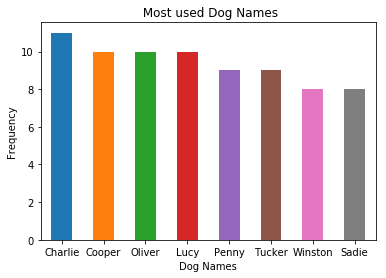

In [727]:
# Plotting and labelling a chart for the Most used Dog Names
# Excluding names like 'a' and 'none'

df6.name.value_counts()[2:10].plot(kind='bar');
plt.title(' Most used Dog Names');
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.xticks(rotation=0);

In [728]:
#the more frequent dog stages
df6.dog_stage.value_counts()

pupper            201
doggo              63
puppo              22
doggo, pupper       8
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_stage, dtype: int64

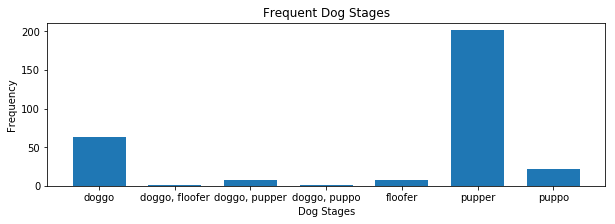

In [746]:
# Plotting and labelling a chart for the more frequent dog stages
# avoiding 'None' entries
#df6= df6[df6["dog_stage"] != '']
plt.figure(figsize=(10, 3))
plt.bar(x= df6['dog_stage'].value_counts().index, height= df6.dog_stage.value_counts().values, align='center', width=0.7)
plt.title("Frequent Dog Stages")
plt.xlabel('Dog Stages');
plt.ylabel('Frequency');

In [730]:
# the Least used Dog Names
df6.name.value_counts()[925:935]

Gilbert     1
Eevee       1
Ed          1
Philbert    1
Jeffrie     1
Herschel    1
Lolo        1
Thor        1
Katie       1
Rilo        1
Name: name, dtype: int64

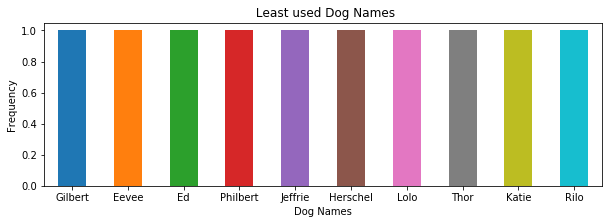

In [748]:
# Plotting and labelling a chart for the Least used Dog Names
plt.figure(figsize=(10, 3))
df6.name.value_counts()[925:936].plot(kind='bar');
plt.title(' Least used Dog Names');
plt.xlabel('Dog Names');
plt.ylabel('Frequency');
plt.xticks(rotation=0);

### Insights:
1.Pupper is the most popular Dog stage, and the least popular Dog stage is Floofer.

2.Charlie is the most used Dog name.

3.The ten least used Dog names used are Gilbert, Eevee, ED, Philbert, jeffrie, Herschel, Lolo, Thor, Kathie, Rilo.

### Visualization

The following bar chart illustrates the popularity of different Dog stages, with Pupper being the most popular and Floofer being the least popular.

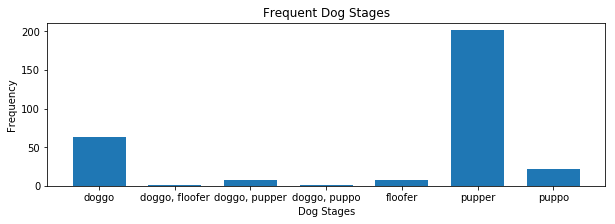

In [750]:
# Plotting and labelling a chart for the more frequent dog stages
plt.figure(figsize=(10, 3))
plt.bar(x= df6['dog_stage'].value_counts().index, height= df6.dog_stage.value_counts().values, align='center', width=0.7)
plt.title("Frequent Dog Stages")
plt.xlabel('Dog Stages');
plt.ylabel('Frequency');